In [1]:
import pandas as pd
from datetime import datetime

In [2]:
#get tesla share price data from yahoo finance
import yfinance as yf
df_tesla=yf.download('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [3]:
type(df_tesla)

pandas.core.frame.DataFrame

The dataset obtained from Yahoo Finance using the yfinance library represents the historical price and trading volume data for a specific stock, in this case, Tesla Inc. (TSLA). Each row in the dataset corresponds to a single trading day, and the columns represent various attributes for that day. Here's what each column in the dataset represents:

**Date:** The date of the trading day.

**Open:** The opening price of TSLA on that trading day.

**High:** The highest price TSLA reached during the trading day.

**Low:** The lowest price TSLA reached during the trading day.

**Close:** The closing price of TSLA at the end of the trading day.

**Adj Close:** The adjusted closing price of TSLA, which accounts for corporate actions like stock splits and dividends.

**Volume:** The trading volume, which is the number of TSLA shares that were traded on that trading day.

This dataset allows to analyze the historical performance of TSLA stock, including how its price and trading volume have changed over time. this data can be used for various purposes, such as technical analysis, trend analysis, and building financial models.

In [4]:
df_tesla.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


<AxesSubplot:xlabel='Date'>

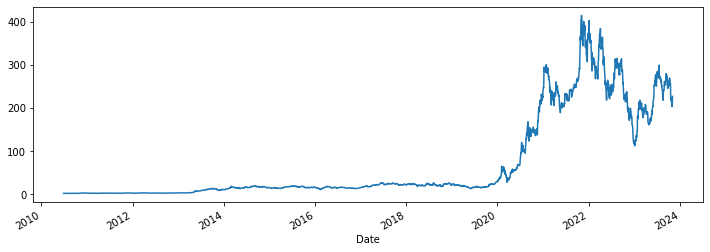

In [5]:
df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

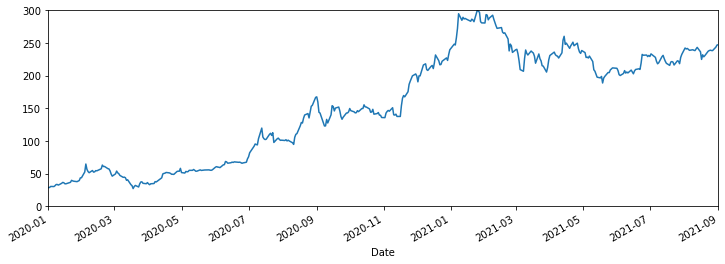

In [6]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,300],figsize=(12,4)) 

<AxesSubplot:xlabel='Date'>

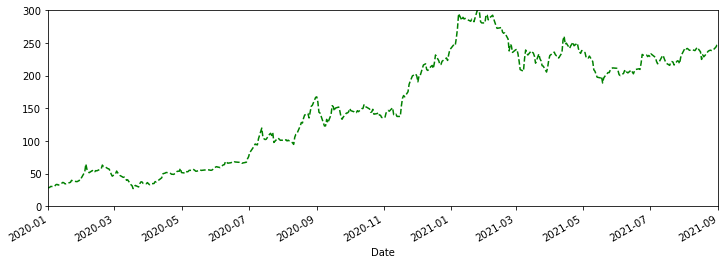

In [7]:
## xlimit and y limit and coloring
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,300],figsize=(12,4),ls='--',c='green')

In [8]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26',
               '2023-10-27', '2023-10-30', '2023-10-31', '2023-11-01',
               '2023-11-02', '2023-11-03'],
              dtype='datetime64[ns]', name='Date', length=3362, freq=None)

In [9]:
#reading specific columns through index
index=df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open=df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [10]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Preventing overlapping

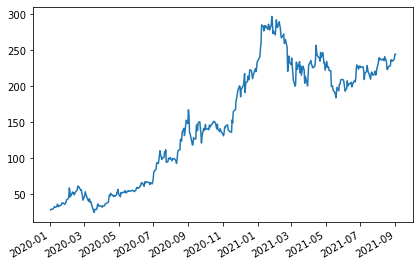

In [12]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

## Datetime Index

In [13]:
df_tesla=df_tesla.reset_index()

In [14]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362 entries, 0 to 3361
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3362 non-null   datetime64[ns]
 1   Open       3362 non-null   float64       
 2   High       3362 non-null   float64       
 3   Low        3362 non-null   float64       
 4   Close      3362 non-null   float64       
 5   Adj Close  3362 non-null   float64       
 6   Volume     3362 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 184.0 KB


In [15]:
df_tesla=df_tesla.set_index('Date',drop=True)

In [16]:
df_tesla.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


# **Time Resampling**

In [17]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-10-30,209.279999,210.880005,194.669998,197.360001,197.360001,136448200
2023-10-31,196.119995,202.800003,194.070007,200.839996,200.839996,118068300
2023-11-01,204.039993,205.990005,197.850006,205.660004,205.660004,121661700


In [18]:
df_tesla.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


In [19]:
df_tesla.resample(rule='B').min() #B- BUSSINESS DAY

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000.0
2010-07-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-10-30,209.279999,210.880005,194.669998,197.360001,197.360001,136448200.0
2023-10-31,196.119995,202.800003,194.070007,200.839996,200.839996,118068300.0
2023-11-01,204.039993,205.990005,197.850006,205.660004,205.660004,121661700.0


In [20]:
# Resampling the time series data based on months 
# we apply it on stock close price 
# 'M' indicates month 
monthly_resampled_data = df_tesla.Close.resample('M').mean() 
# the above command will find the mean closing price 
# of each month for a duration of 12 months. 
monthly_resampled_data

Date
2010-06-30      1.590667
2010-07-31      1.303873
2010-08-31      1.300727
2010-09-30      1.382698
2010-10-31      1.380889
                 ...    
2023-07-31    273.505500
2023-08-31    242.333043
2023-09-30    256.968000
2023-10-31    236.907727
2023-11-30    214.710002
Freq: M, Name: Close, Length: 162, dtype: float64

In [21]:
# Resampling the time series data 
#  based on Quarterly frequency 
# 'Q' indicates quarter 
  
Quarterly_resampled_data = df_tesla.Open.resample('Q').mean() 
  
# mean opening price of each quarter 
# over a period of 1 year. 
Quarterly_resampled_data 

Date
2010-06-30      1.493000
2010-09-30      1.341563
2010-12-31      1.781615
2011-03-31      1.617634
2011-06-30      1.824212
2011-09-30      1.731031
2011-12-31      1.977852
2012-03-31      2.127290
2012-06-30      2.117630
2012-09-30      1.989302
2012-12-31      2.087473
2013-03-31      2.435033
2013-06-30      5.008896
2013-09-30      9.854521
2013-12-31     10.263052
2014-03-31     13.430000
2014-06-30     13.900349
2014-09-30     16.518344
2014-12-31     15.644573
2015-03-31     13.488022
2015-06-30     15.749407
2015-09-30     16.989000
2015-12-31     14.982792
2016-03-31     13.178721
2016-06-30     15.184052
2016-09-30     14.443302
2016-12-31     13.157608
2017-03-31     16.861280
2017-06-30     21.996614
2017-09-30     23.136529
2017-12-31     21.752953
2018-03-31     22.000721
2018-06-30     20.265146
2018-09-30     20.811799
2018-12-31     21.545714
2019-03-31     20.047585
2019-06-30     15.581778
2019-09-30     15.645073
2019-12-31     21.578646
2020-03-31     41.38

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

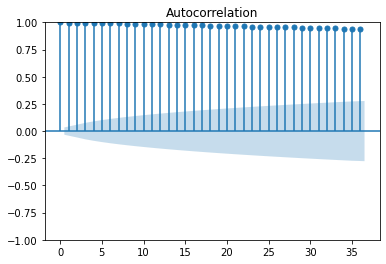

In [23]:
acf = plot_acf(df_tesla["Close"].dropna())

In [24]:
print(f"""Tesla Missing Values: {df_tesla.isna().any(axis=1).sum()}\n{df_tesla[df_tesla.isna().any(axis=1)].index} \n""")

Tesla Missing Values: 0
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None) 



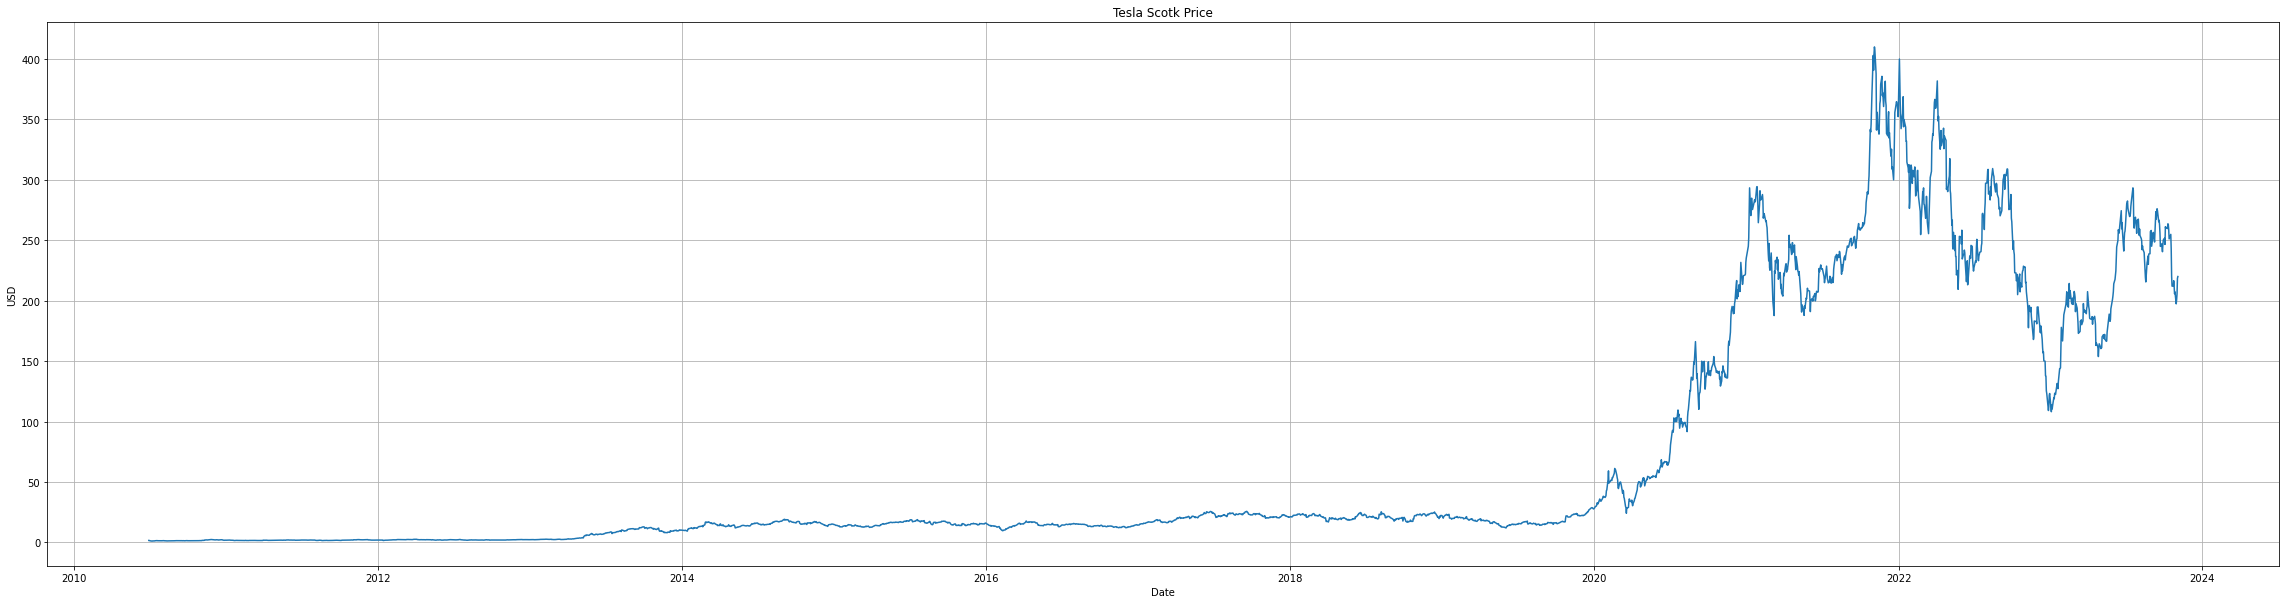

In [27]:
from matplotlib import rcParams
import matplotlib.pyplot as plt

def plot_df(data_frame, x_data, y_data, title, ylabel):
    plt.figure(figsize=(40, 10))
    plt.plot(x_data, y_data)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Usage:
rcParams['figure.figsize'] = 40, 10
plot_df(df_tesla, df_tesla.index , df_tesla['Close'], title='Tesla Scotk Price',ylabel='USD')

# Stationary Time-Series
**Augmented Dicky Fuller (ADF) test**

In [28]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_tesla['Close'])
print(f"""
ADF Value : {adf_test[0]}
P Value : {adf_test[1]}
""")


ADF Value : -1.0222074558573442
P Value : 0.7450787210848727




When you run the ADF test, the result should be negative value, and the P-value should beneath certain threshold. For example, we will use p-value < 5%. Based on the result, the ADF Value is -1.02 which means our data is not stationary enough. This result also show that p-value >5%, even far more than 10%.
**This indicate that our data is statistically not stationary.**

# Change Time-Series into Stationary
There are some ways to make a series into stationary:
     - Differencing the Series
     - Transform the series to its log
     - Transform the series to its root
     - Other combination

***Applying log to the data will effectively remove the magnitude of changes and also can make the time-series from multiplicative into additive.***

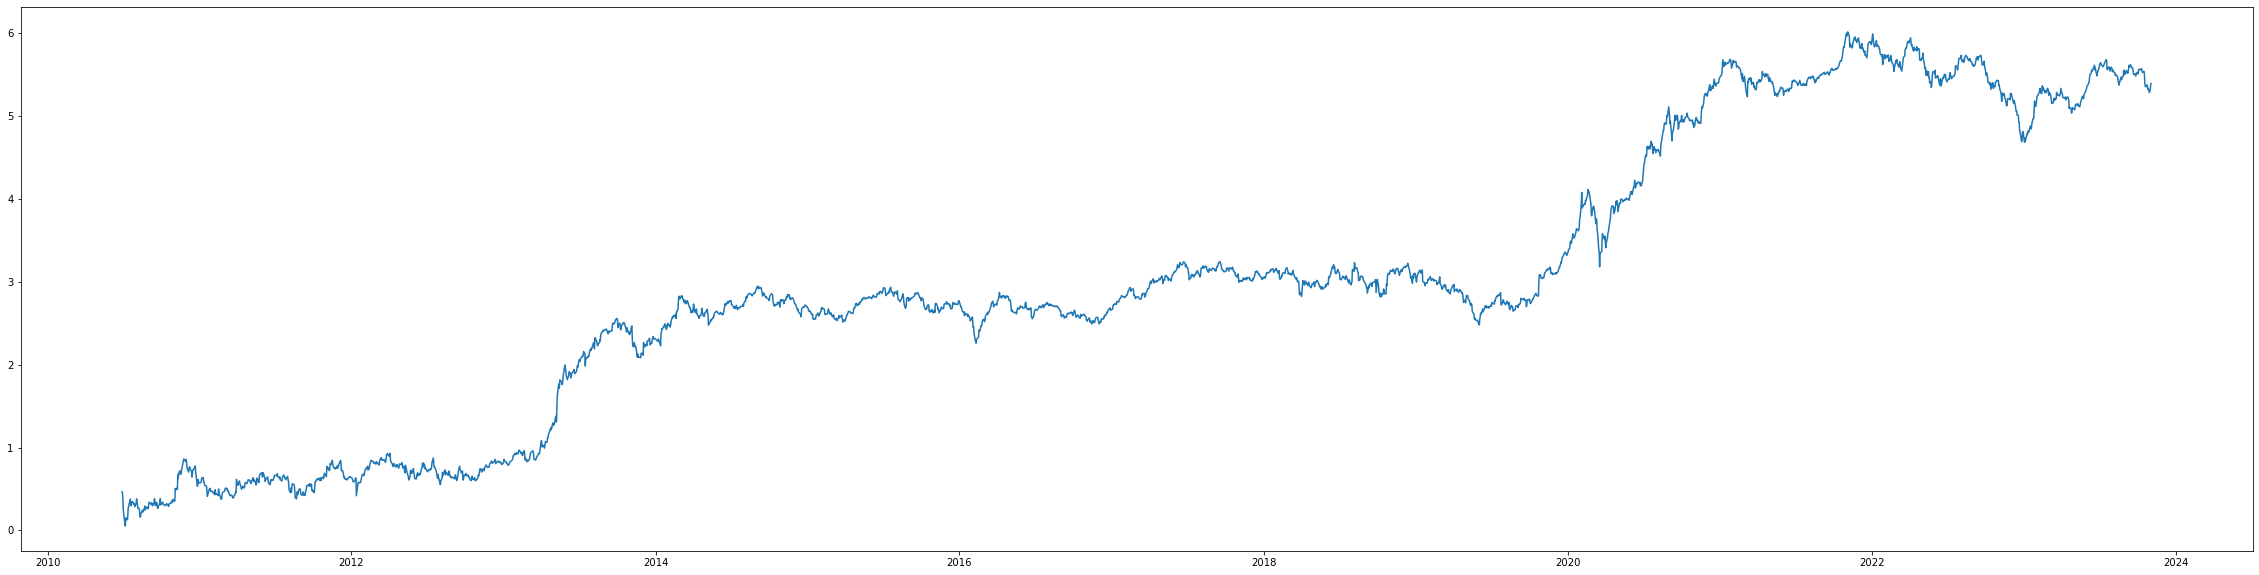

In [30]:
import numpy as np 
plt.plot(df_tesla.apply(np.log)['Close'])

In [31]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(np.log(df_tesla['Close']))
print(f"""
ADF Value : {adf_test[0]}
P Value : {adf_test[1]}
""")


ADF Value : -0.7502447363540797
P Value : 0.8333023994148527



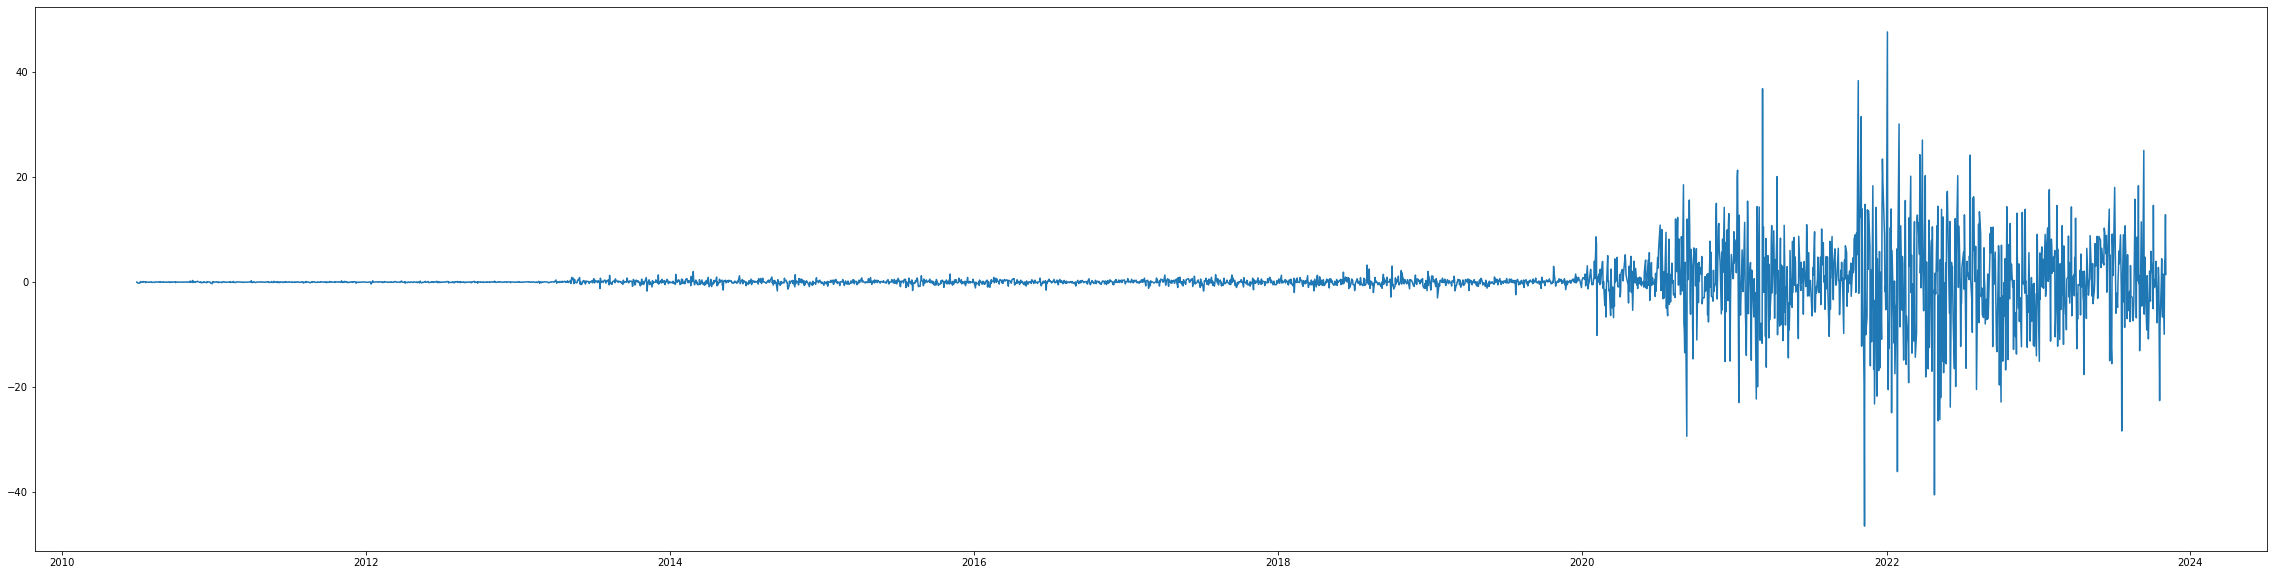

In [32]:
plt.plot(df_tesla['Close'].diff(1).fillna(0))

In [33]:
tesla_st = df_tesla.diff(1).fillna(0)
tesla_st.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,0.000000,0.000000,0.000,0.000000,0.000000,0.0
2010-06-30,0.452666,0.361333,0.384,-0.004000,-0.004000,-23688000.0
2010-07-01,-0.052666,-0.300000,-0.202,-0.124667,-0.124667,-134524500.0
2010-07-02,-0.133334,-0.188000,-0.104,-0.184000,-0.184000,-46185000.0
2010-07-06,-0.200000,-0.206667,-0.192,-0.206000,-0.206000,25906500.0


In [34]:
tesla_reconstruct = tesla_st.copy()
tesla_reconstruct.iloc[0,:] = df_tesla.iloc[0,:]
tesla_reconstruct = tesla_reconstruct.cumsum()

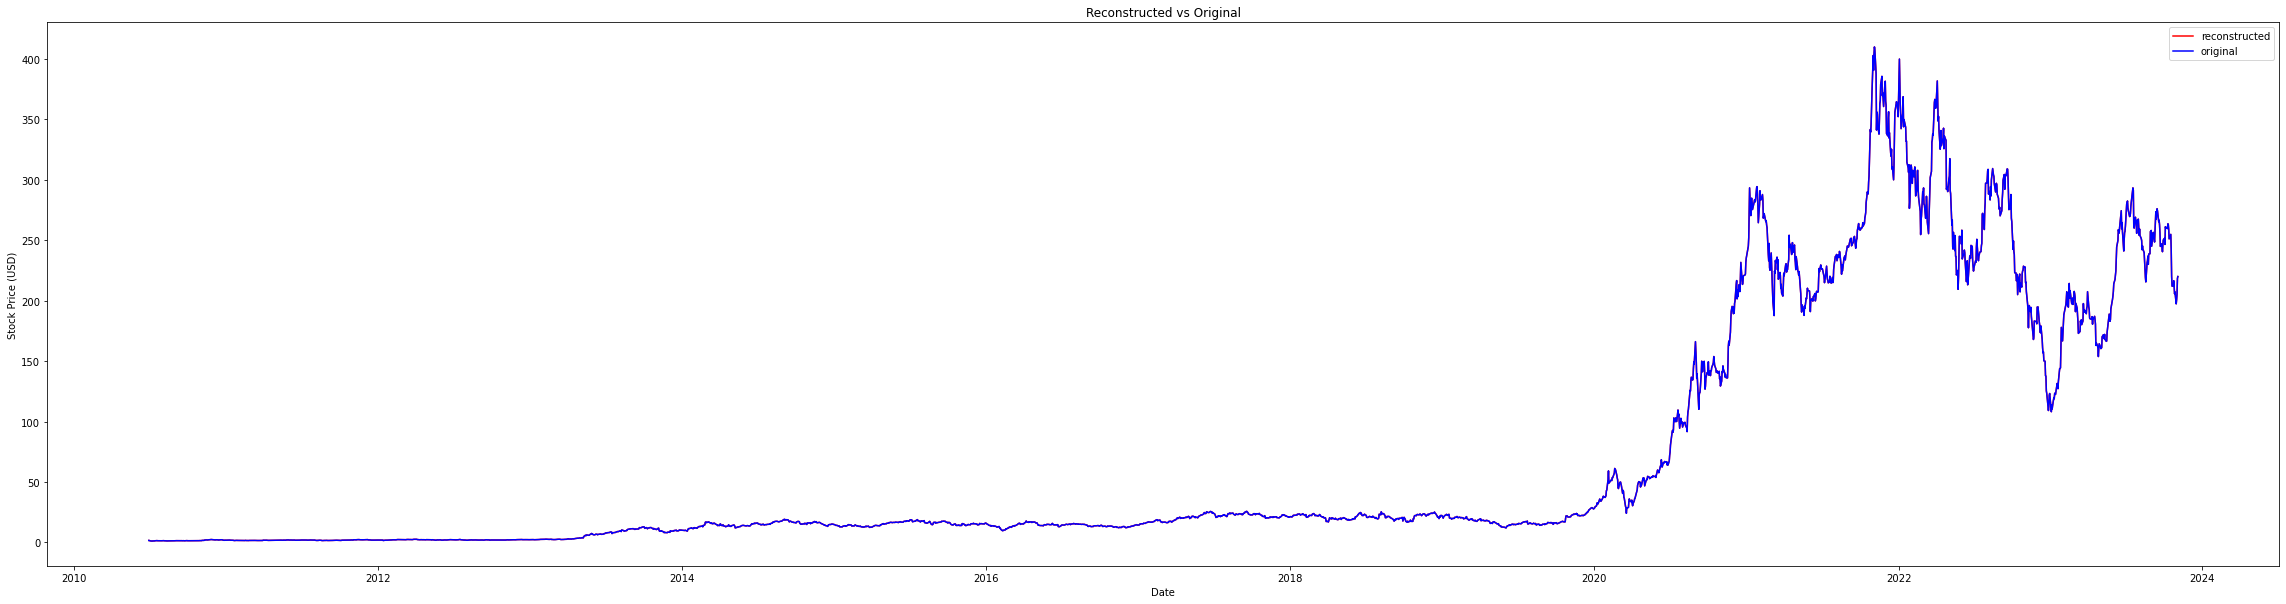

In [35]:
plt.plot(df_tesla.index, tesla_reconstruct['Close'], 'r-',  label='reconstructed')
plt.plot(df_tesla.index, df_tesla['Close'], 'b-', label = 'original')
plt.xlabel('Date'); plt.ylabel('Stock Price (USD)')
plt.title('Reconstructed vs Original')
plt.legend();

In [36]:
class TimeSeriesData():
    def __init__(self, df):
        self.data = df 
        self.stationary = self.stationarize(df)
        self.reconstructed = self.reconstruct(self.stationary, self.data)
        
    def reconstruct(self, st, org):
        x = st.copy()
        x.iloc[0,:] = org.iloc[0,:]
        return x.cumsum()
    
    def stationarize(self, data):
        return data.diff(1).fillna(0)

In [37]:
x_train = TimeSeriesData(df_tesla[:int((len(df_tesla)*0.9))])
x_valid = TimeSeriesData(df_tesla[int((len(df_tesla)*0.9)):])
x_train.data.shape[0] + x_valid.data.shape[0] == df_tesla.shape[0]

True

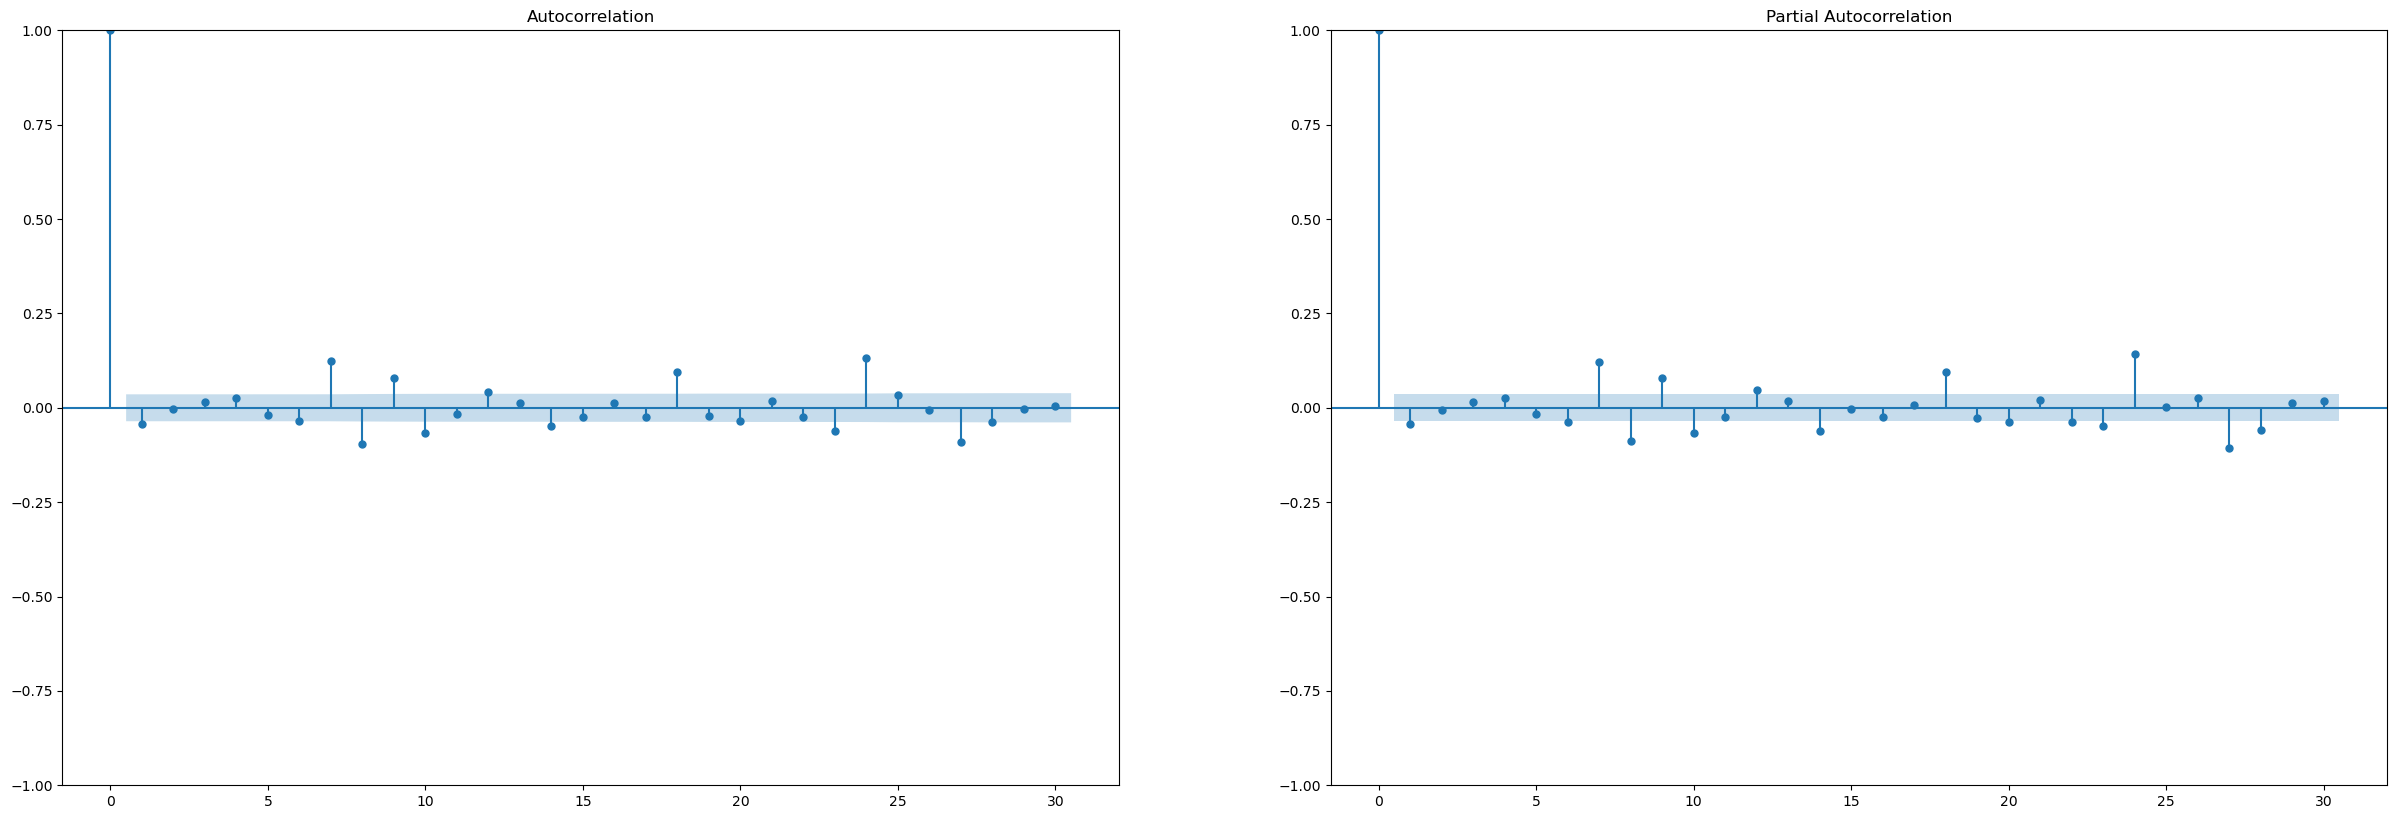

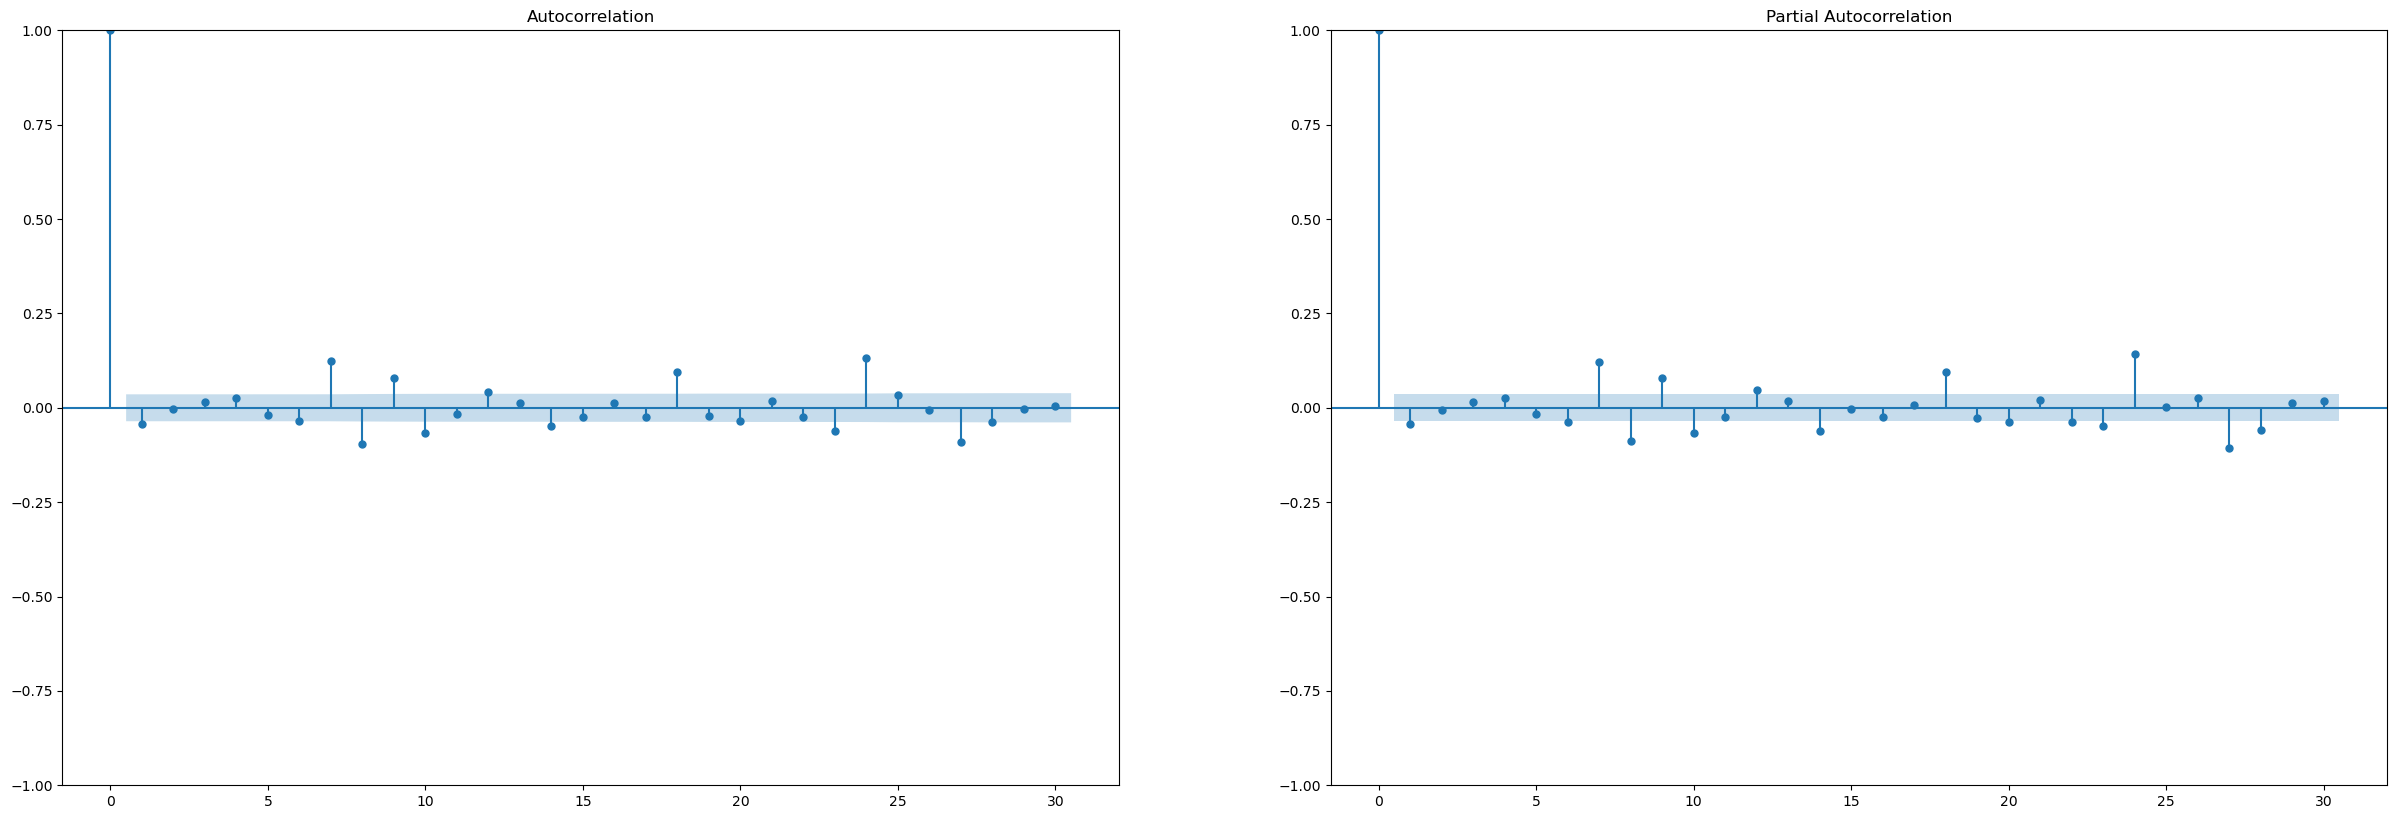

In [48]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(30,10), dpi= 100)
plot_acf(x_train.stationary['Close'].values.tolist(), lags=30, ax=axes[0])
plot_pacf(x_train.stationary['Close'].values.tolist(), lags=30, ax=axes[1])

In [49]:
##Business End Frequency
df_tesla.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-30,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-30,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


In [50]:
dd=df_tesla.resample(rule='BQS').max()
def df():
    print(dd.head())
    print("shape of resample data(dd):")
    print(dd.shape)

In [51]:
df()

                Open   High       Low     Close  Adj Close     Volume
Date                                                                 
2010-04-01  1.719333  2.028  1.553333  1.592667   1.592667  281494500
2010-07-01  1.666667  1.728  1.408667  1.465333   1.465333  123282000
2010-10-01  2.391333  2.428  2.316667  2.364667   2.364667  139528500
2011-01-03  1.906000  1.914  1.870000  1.896667   1.896667  172767000
2011-04-01  2.006667  2.100  1.970000  2.009333   2.009333   93138000
shape of resample data(dd):
(55, 6)


<AxesSubplot:xlabel='Date'>

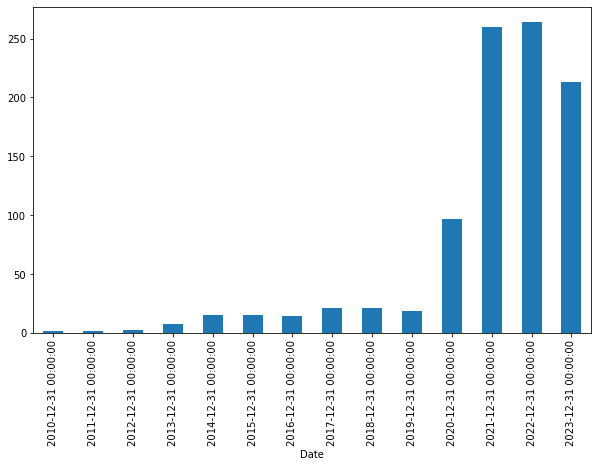

In [52]:
##plotting
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar',figsize=(10,6))

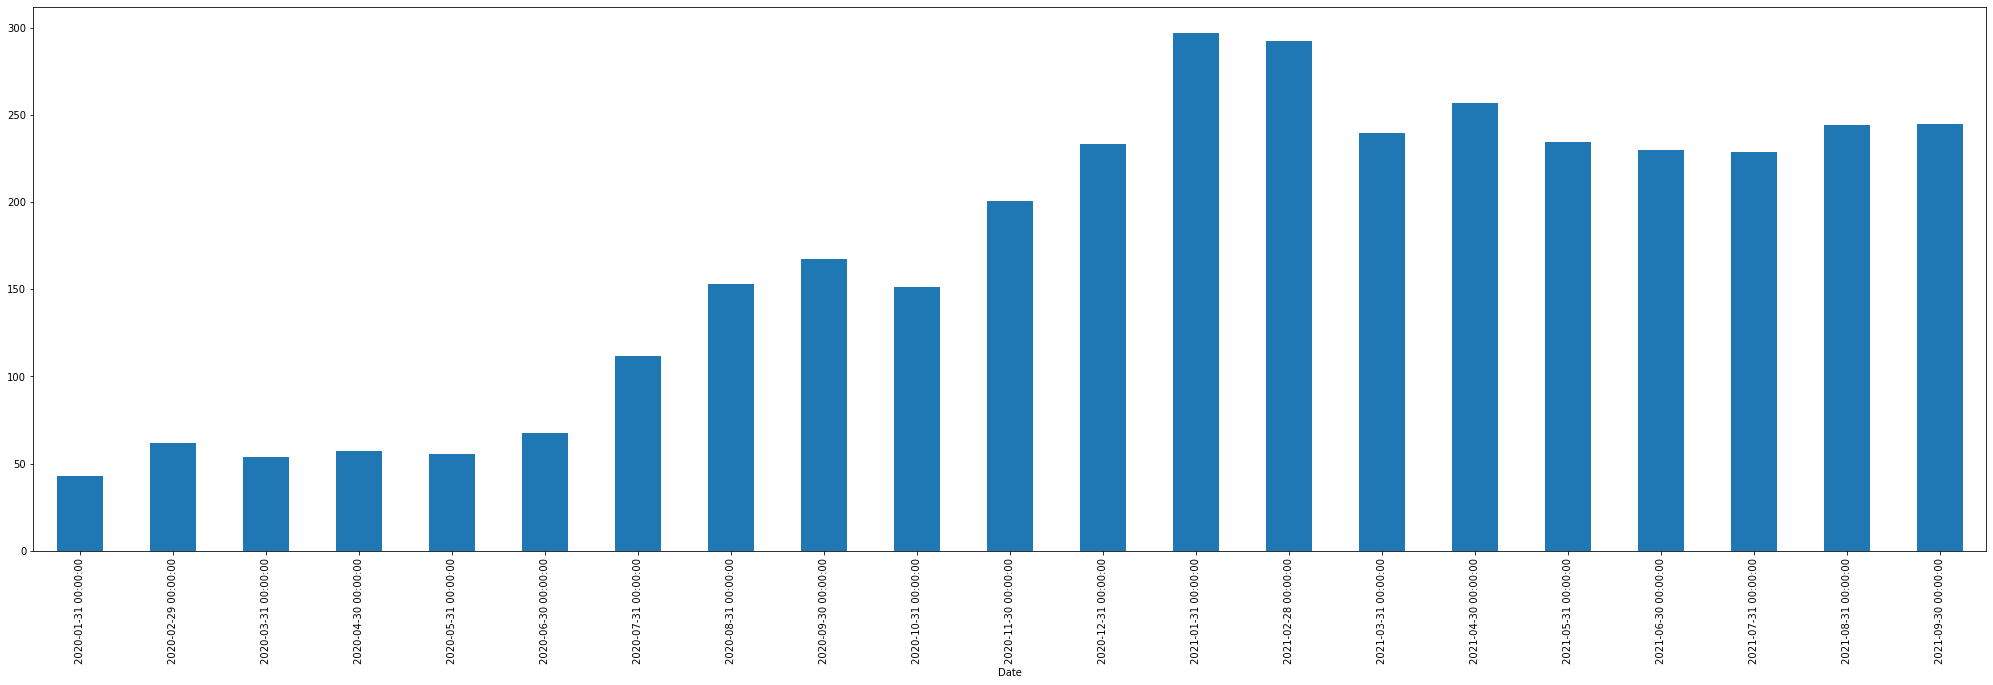

In [53]:
share_open.resample(rule='M').max().plot(kind='bar',figsize=(35,10))
figure.autofmt_xdate()

In [54]:
df_tesla['High'].rolling(11).max().head(20)

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13         NaN
2010-07-14    2.028000
2010-07-15    2.028000
2010-07-16    1.728000
2010-07-19    1.540000
2010-07-20    1.483333
2010-07-21    1.483333
2010-07-22    1.483333
2010-07-23    1.483333
2010-07-26    1.483333
2010-07-27    1.483333
Name: High, dtype: float64

In [55]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [56]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()
df_tesla.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,NaN
2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,NaN
2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,NaN
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,NaN


In [57]:
index=df_tesla.loc['2020-01-01':'2021-09-01'].index
share_opent=df_tesla.loc['2020-01-01':'2021-09-01'][['Open','Open:30 days rolling']]

<AxesSubplot:xlabel='Date'>

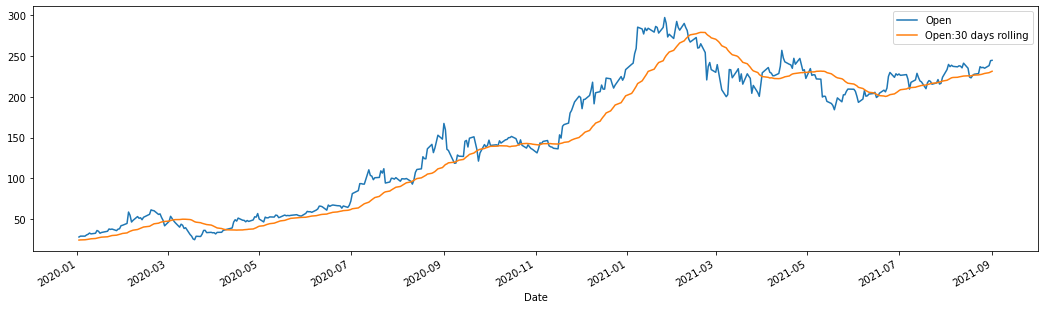

In [58]:
share_opent[['Open','Open:30 days rolling']].plot(figsize=(18,5))


The graph allows you to compare the short-term movements in the "Open" prices (daily fluctuations) with the longer-term trend indicated by the 30-day rolling mean. Here's what you can infer from the graph:

**When the "Open" Prices line crosses above the "30-Day Rolling Mean" line, it may indicate a short-term uptrend.**

**When the "Open" Prices line crosses below the "30-Day Rolling Mean" line, it may indicate a short-term downtrend.**

**The "30-Day Rolling Mean" line provides a smoother representation of the overall trend, helping you identify longer-term patterns and changes in the stock's performance.**

The graph is a valuable tool for technical analysis, as it can assist in identifying potential buying or selling signals based on the relationship between the actual prices and the rolling mean.

# the maximum price of the share from 2017 to 2022

In [59]:
# Assuming you have a DateTime index
# Filter the DataFrame to include data from 2017 to 2022
price_data_2017_to_2022 = df_tesla['2017-01-01':'2022-12-31']

# Find the maximum closing price within this time frame
max_price = price_data_2017_to_2022['High'].max()

print("Maximum price from 2017 to 2022:", max_price)

Maximum price from 2017 to 2022: 414.4966735839844


**.idxmax() method on the "High" column to find the index (date) corresponding to the maximum price within that time frame.**

**.idxmin() method on the "Low" column to find the index (date) corresponding to the minimum price within that time frame.**

In [60]:
# Assuming you have a DateTime index
# Filter the DataFrame to include data from 2017 to 2022
price_data_2017_to_2022 = df_tesla['2017-01-01':'2022-12-31']

# Find the date corresponding to the maximum closing price within this time frame
date_of_max_price = price_data_2017_to_2022['High'].idxmax()

print("Date of the highest price from 2017 to 2022:", date_of_max_price)

date_of_min_price = price_data_2017_to_2022['Low'].idxmin()

print("Date of the lowest price from 2017 to 2022:", date_of_min_price)

Date of the highest price from 2017 to 2022: 2021-11-04 00:00:00
Date of the lowest price from 2017 to 2022: 2019-06-03 00:00:00


#  "How strongly is this stock correlated with the market?"

In [61]:
import yfinance as yf
market_data = yf.download('^GSPC', start='2017-01-01', end='2022-12-31')
combined_data = pd.DataFrame({'Stock': df_tesla.loc['2017-01-01':'2022-12-31']['Adj Close'], 'Market': market_data['Adj Close']})
correlation = combined_data.corr()

[*********************100%%**********************]  1 of 1 completed


In [62]:
market_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000
...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000


In [63]:
combined_data

,Stock,Market
Date,,
2017-01-03,14.466000,2257.830078
2017-01-04,15.132667,2270.750000
2017-01-05,15.116667,2269.000000
2017-01-06,15.267333,2276.979980
2017-01-09,15.418667,2268.899902
...,...,...
2022-12-23,123.150002,3844.820068
2022-12-27,109.099998,3829.250000
2022-12-28,112.709999,3783.219971


In [64]:
correlation

,Stock,Market
Stock,1.000000,0.938787
Market,0.938787,1.000000


[*********************100%%**********************]  1 of 1 completed


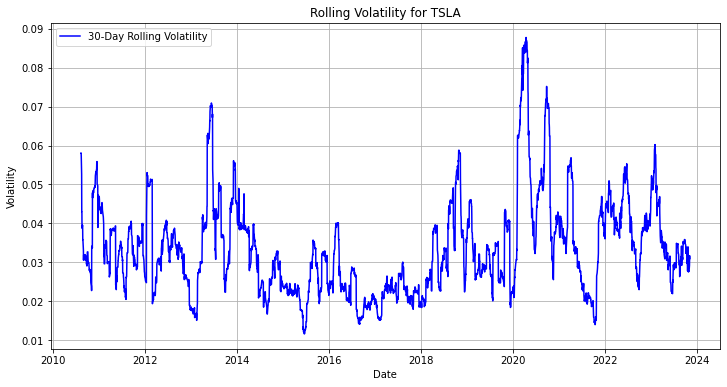

In [66]:
ticker = 'TSLA'
start_date = '2020-01-01'
end_date = '2022-12-31'
df = yf.download(ticker, start=start_date, end=end_date)
df_tesla['Daily Returns'] = df_tesla['Adj Close'].pct_change()

# Calculate rolling volatility (e.g., 30-day rolling standard deviation)
rolling_volatility = df_tesla['Daily Returns'].rolling(window=30).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility, color='blue', label='30-Day Rolling Volatility')
plt.title('Rolling Volatility for ' + ticker)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Volatility in the context of stocks and financial markets refers to the degree of variation in a stock's price over time. It quantifies the degree of risk or uncertainty associated with the stock's price movements. High volatility indicates that a stock's price can vary significantly over a short period, while low volatility suggests more stable and predictable price movements.

Rolling volatility, also known as rolling standard deviation, is a statistical measure that calculates the volatility of a time series data, such as stock prices, over a specific rolling or moving window. It provides a way to assess how the volatility of the data changes over time, allowing you to capture short-term fluctuations and trends in the data series. Rolling volatility is commonly used in financial analysis to understand the changing risk and uncertainty associated with an asset's price movements.
**Increasing rolling volatility signals higher market uncertainty, presenting trading opportunities and risk for investors. It may prompt risk management and hedging strategies. Decreasing rolling volatility implies a more stable market, favoring trend-following and income strategies, while potentially lowering perceived risk and favoring riskier assets.**

In [68]:
def calculate_rolling_volatility(stock_data, window_size):
    """
    Calculate rolling volatility of a stock's daily returns.

    Parameters:
    - stock_data: DataFrame with 'Date' and 'Adj Close' columns.
    - window_size: Rolling window size (e.g., 30 for a 30-day window).

    Returns:
    - Series with rolling volatility values.
    """
    daily_returns = stock_data['Adj Close'].pct_change()
    rolling_volatility = daily_returns.rolling(window=window_size).std()
    return rolling_volatility


**Calculate rolling volatility with a 30-day window**

In [73]:
rolling_volatility = calculate_rolling_volatility(df, window_size=30)

In [77]:
rolling_volatility.head(32)

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
2020-01-09         NaN
2020-01-10         NaN
2020-01-13         NaN
2020-01-14         NaN
2020-01-15         NaN
2020-01-16         NaN
2020-01-17         NaN
2020-01-21         NaN
2020-01-22         NaN
2020-01-23         NaN
2020-01-24         NaN
2020-01-27         NaN
2020-01-28         NaN
2020-01-29         NaN
2020-01-30         NaN
2020-01-31         NaN
2020-02-03         NaN
2020-02-04         NaN
2020-02-05         NaN
2020-02-06         NaN
2020-02-07         NaN
2020-02-10         NaN
2020-02-11         NaN
2020-02-12         NaN
2020-02-13         NaN
2020-02-14    0.062237
2020-02-18    0.062902
Name: Adj Close, dtype: float64

# Statistical Analysis and Inference

In [85]:
mean_volatility = rolling_volatility.mean()
median_volatility = rolling_volatility.median()
max_volatility = rolling_volatility.max()
min_volatility = rolling_volatility.min()

In [86]:
print("mean_volatility:",mean_volatility)
print("median_volatility:",median_volatility)
print("max_volatility:",max_volatility)
print("min_volatility:",min_volatility)

mean_volatility: 0.04220344648694998
median_volatility: 0.040388673510041474
max_volatility: 0.08778839766425724
min_volatility: 0.013972881661452611


# How has the stock price of a company (e.g., Tesla) changed over a specific time period?

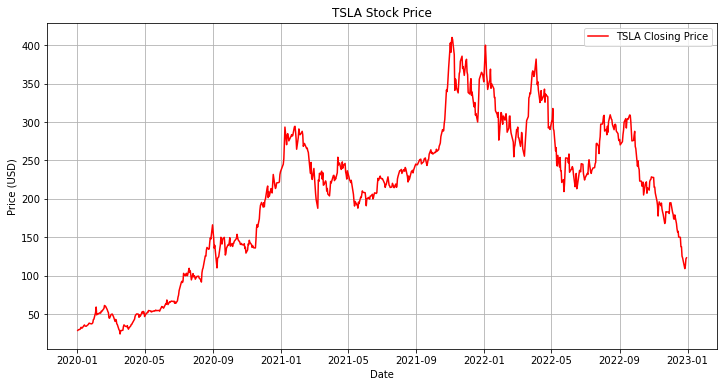

In [88]:
# Plot the daily closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label=f'{ticker} Closing Price', color='red')
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

 # Is there a correlation between the stock price of one company and another (e.g., Tesla and Ford)?

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


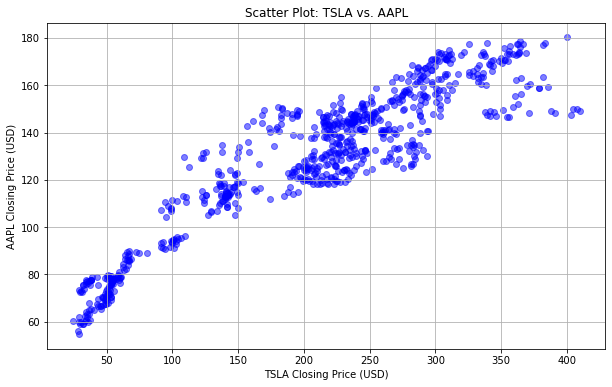

In [90]:
# Download historical stock data for two stocks (e.g., Tesla and Apple)
ticker_A = 'TSLA'
ticker_B = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'

df_A = yf.download(ticker_A, start=start_date, end=end_date)
df_B = yf.download(ticker_B, start=start_date, end=end_date)

# Plot a scatter plot comparing the closing prices of the two stocks
plt.figure(figsize=(10, 6))
plt.scatter(df_A['Adj Close'], df_B['Adj Close'], c='blue', alpha=0.5)
plt.title(f'Scatter Plot: {ticker_A} vs. {ticker_B}')
plt.xlabel(f'{ticker_A} Closing Price (USD)')
plt.ylabel(f'{ticker_B} Closing Price (USD)')
plt.grid(True)
plt.show()

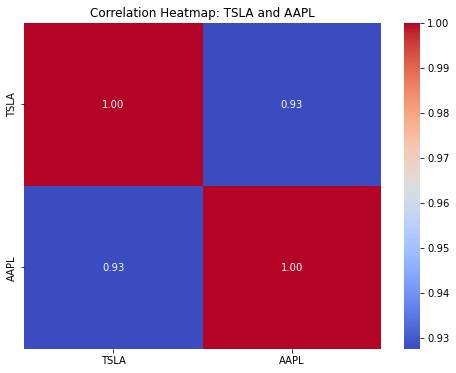

In [92]:
import seaborn as sns
# Combine the closing prices of both stocks into a single DataFrame
df_combined = pd.concat([df_A['Adj Close'], df_B['Adj Close']], axis=1)
df_combined.columns = [ticker_A, ticker_B]

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Create a heatmap to visualize the correlation between the two stocks
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap: {ticker_A} and {ticker_B}')
plt.show()